# Script information 

**Aim:** Unsupervised clustering of tweets text based on stance label

**Author:** Laura Espinosa

**Date created:** 11 September 2024

**Date updated:** 11 September 2024


# Import libraries and data

In [1]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import nltk
nltk.download('rslp')
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.decomposition import PCA

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lespinosa\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [2]:
# Download Portuguese stop words
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lespinosa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
stop_words = set(stopwords.words('portuguese'))

In [4]:
# Import data
df = pd.read_csv("../data/local/tweets_BR_PT_gpt.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703009 entries, 0 to 1703008
Data columns (total 41 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      float64
 1   text                    object 
 2   label                   object 
 3   in_reply_to_status_id   float64
 4   in_reply_to_user_id     float64
 5   quoted_user_id          float64
 6   quoted_status_id        float64
 7   retweeted_user_id       float64
 8   retweeted_status_id     float64
 9   created_at              object 
 10  entities.user_mentions  object 
 11  user.id                 float64
 12  user.screen_name        object 
 13  user.name               object 
 14  user.description        object 
 15  user.timezone           float64
 16  user.location           object 
 17  user.num_followers      int64  
 18  user.num_following      int64  
 19  user.created_at         object 
 20  user.statuses_count     int64  
 21  user.is_verified        bool   

In [5]:
df_tok = pd.read_csv("../data/local/tweet_text_preprocessed.csv")
df_tok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703009 entries, 0 to 1703008
Data columns (total 44 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   id                      float64
 2   text                    object 
 3   label                   object 
 4   in_reply_to_status_id   float64
 5   in_reply_to_user_id     float64
 6   quoted_user_id          float64
 7   quoted_status_id        float64
 8   retweeted_user_id       float64
 9   retweeted_status_id     float64
 10  created_at              object 
 11  entities.user_mentions  object 
 12  user.id                 float64
 13  user.screen_name        object 
 14  user.name               object 
 15  user.description        object 
 16  user.timezone           float64
 17  user.location           object 
 18  user.num_followers      int64  
 19  user.num_following      int64  
 20  user.created_at         object 
 21  user.statuses_count     int64  

# Unsupervised clustering of tweet texts

In [21]:
# Text processing function
def preprocess_text(text):
    # Tokenization, normalization, stopwords removal, stemming
    stemmer = RSLPStemmer()
    stop_words = set(stopwords.words('portuguese'))
    text = text.lower()
    #text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation/special chars
    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [24]:
tqdm.pandas(desc="Processing rows")
df['cleaned_text'] = df['text'].progress_apply(preprocess_text)

Processing rows: 100%|██████████| 1703009/1703009 [1:28:35<00:00, 320.37it/s]


In [34]:
import re
def preprocess_text(text):
    stemmer = RSLPStemmer()
    stop_words = set(stopwords.words('portuguese'))

    # Lowercase the text
    text = text.lower()

    # Remove URLs, mentions, and punctuation
    text = re.sub(r'<url>', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)   # Remove mentions
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation/special chars

    # Tokenize and filter out stopwords
    tokens = text.split()
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)

In [5]:
import spacy
import re
from nltk.corpus import stopwords

import spacy
nlp = spacy.load("C:/Users/lespinosa/Downloads/pt_core_news_sm-3.0.0")


# Preprocessing function with lemmatization
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))
    # Lowercase the text
    text = text.lower()
    # Remove URLs, mentions, and punctuation
    #text = re.sub(r'<url>', '', text)  # Remove URLs
    #text = re.sub(r'@\w+', '', text)   # Remove mentions
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation/special chars
    # Apply spaCy for lemmatization and stopword removal
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and len(token.text) > 2]
    return ' '.join(tokens)




ImportError: cannot import name util

In [48]:
import spacy
nlp = spacy.load("pt_core_news_sm")

doc = nlp("Eu gosto de aprender Python.")
for token in doc:
    print(token.text, token.lemma_)


TypeError: issubclass() arg 1 must be a class

In [35]:
tqdm.pandas(desc="Processing rows")
df['cleaned_text_lem'] = df['text'].progress_apply(preprocess_text)

Processing rows: 100%|██████████| 1703009/1703009 [1:14:08<00:00, 382.87it/s]


In [36]:
df.to_csv("../data/local/tweet_text_preprocessed.csv")

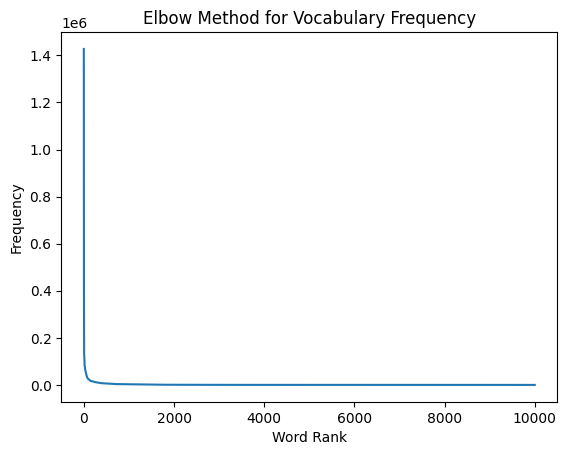

In [38]:
# Converting text to numbers for clustering
from collections import Counter

# Tokenize and count word frequencies in the dataset
all_words = ' '.join(df['cleaned_text2']).split()
word_freq = Counter(all_words)

# Sort word frequencies in descending order
word_freq_sorted = sorted(word_freq.values(), reverse=True)

# Plot the elbow curve of word frequencies


plt.plot(word_freq_sorted[:10000])  # Limit to 10,000 for visualization
plt.title('Elbow Method for Vocabulary Frequency')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.show()

In [39]:
from collections import Counter

# Combine all the cleaned text data
all_words = ' '.join(df['cleaned_text2']).split()

# Count the frequency of each word
word_freq = Counter(all_words)

# Get the 20 most common words
print(word_freq.most_common(20))

[('vacin', 1427383), ('tom', 507282), ('contr', 449304), ('vacina', 418847), ('pra', 263548), ('filh', 225359), ('grip', 154304), ('campanh', 136199), ('est', 128725), ('ginecolog', 124442), ('febr', 120323), ('mastolog', 113736), ('sad', 111256), ('dia', 110957), ('amarel', 98163), ('ano', 97398), ('faz', 84578), ('nunc', 82916), ('saramp', 82266), ('tod', 81774)]


# after tokenization

In [11]:
df_tok['cleaned_text2_nonna'] = df_tok['cleaned_text2'].fillna('')

In [6]:
portuguese_stopwords = list(stopwords.words('portuguese'))

In [12]:
# Assuming df_tok['cleaned_text2'] contains your preprocessed text data
# Create a TfidfVectorizer with Portuguese stopwords
vectorizer = TfidfVectorizer(stop_words=portuguese_stopwords)

# Use tqdm to track the progress of text data transformation
texts = df_tok['cleaned_text2_nonna'].values.tolist()

# Wrap the text data with tqdm to display progress
texts_iter = tqdm(texts, desc="Vectorizing Texts", unit="text")

# Now apply the TfidfVectorizer using the tqdm iterator
X = vectorizer.fit_transform(texts_iter)

Vectorizing Texts: 100%|██████████| 1703009/1703009 [00:39<00:00, 42763.27text/s]


In [13]:
print(X.shape)

(1703009, 120884)


In [14]:
X

<1703009x120884 sparse matrix of type '<class 'numpy.float64'>'
	with 16602654 stored elements in Compressed Sparse Row format>

In [11]:
import scipy.sparse as sp

X_test = X[:10000, :]

# If you want to convert it to a dense matrix (not recommended for large matrices)
# dense_matrix = first_1000_rows.toarray()

In [ ]:
n_clusters = 5
max_iter = 300

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, algorithm = 'elkan', 
                verbose =0, random_state=42)

# Manually fit KMeans and track progress with tqdm
for i in tqdm(range(max_iter), desc="KMeans Progress", unit="iteration"):
    kmeans.max_iter = i + 1
    kmeans.fit(X)

# Get the final cluster predictions
predictions = kmeans.predict(X)

KMeans Progress:   0%|          | 0/30 [00:00<?, ?iteration/s]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Initialization complete
Iteration 0, inertia 3139966.6648518895
Initialization complete
Iteration 0, inertia 3136010.873276165
Initialization complete
Iteration 0, inertia 3125459.057549492
Initialization complete
Iteration 0, inertia 2980109.543939657
Initialization complete
Iteration 0, inertia 3083118.462930273
Initialization complete
Iteration 0, inertia 3033058.2342240117
Initialization complete
Iteration 0, inertia 2973269.935005405
Initialization complete
Iteration 0, inertia 3131324.496890348
Initialization complete
Iteration 0, inertia 3129477.954234613


KMeans Progress:   3%|▎         | 1/30 [18:10<8:47:04, 1090.50s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Initialization complete
Iteration 0, inertia 3136010.873276165
Iteration 1, inertia 1601247.5260088064
Initialization complete
Iteration 0, inertia 3125459.057549492
Iteration 1, inertia 1624026.1591941454
Initialization complete
Iteration 0, inertia 2980109.543939657
Iteration 1, inertia 1623314.7585154905
Initialization complete
Iteration 0, inertia 3083118.462930273
Iteration 1, inertia 1616018.8932818207
Initialization complete
Iteration 0, inertia 3033058.2342240117
Iteration 1, inertia 1600721.739431683
Initialization complete
Iteration 0, inertia 2973269.935005405
Iteration 1, inertia 1596777.019608997
Initialization complete
Iteration 0, inertia 3131324.496890348
Iteration 1, inertia 1610191.0577956727
Initialization complete
Iteration 0, inertia 3129477.954234613
Iteration 1

KMeans Progress:   7%|▋         | 2/30 [40:00<9:29:15, 1219.82s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Initialization complete
Iteration 0, inertia 3136010.873276165
Iteration 1, inertia 1601247.5260088064
Iteration 2, inertia 1595612.9966831075
Initialization complete
Iteration 0, inertia 3125459.057549492
Iteration 1, inertia 1624026.1591941454
Iteration 2, inertia 1610408.2183161504
Initialization complete
Iteration 0, inertia 2980109.543939657
Iteration 1, inertia 1623314.7585154905
Iteration 2, inertia 1609143.4486262759
Initialization complete
Iteration 0, inertia 3083118.462930273
Iteration 1, inertia 1616018.8932818207
Iteration 2, inertia 1596086.98489038
Initialization complete
Iteration 0, inertia 3033058.2342240117
Iteration 1, inertia 1600721.739431683
Iteration 2, inertia 1583714.8805901234
In

KMeans Progress:  10%|█         | 3/30 [1:05:33<10:13:11, 1362.64s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Iteration 3, inertia 1579664.6631910556
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Iteration 3, inertia 1544006.1977193928
Initialization complete
Iteration 0, inertia 3136010.873276165
Iteration 1, inertia 1601247.5260088064
Iteration 2, inertia 1595612.9966831075
Iteration 3, inertia 1594857.963237321
Initialization complete
Iteration 0, inertia 3125459.057549492
Iteration 1, inertia 1624026.1591941454
Iteration 2, inertia 1610408.2183161504
Iteration 3, inertia 1593838.5351409756
Initialization complete
Iteration 0, inertia 2980109.543939657
Iteration 1, inertia 1623314.7585154905
Iteration 2, inertia 1609143.4486262759
Iteration 3, inertia 1594911.9162461262
Initialization complete
Iteration 0, inertia 3083118.462930273
Iteration 1, inertia 161

KMeans Progress:  13%|█▎        | 4/30 [1:32:45<10:36:34, 1469.03s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Iteration 3, inertia 1579664.6631910556
Iteration 4, inertia 1576563.947202216
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Iteration 3, inertia 1544006.1977193928
Iteration 4, inertia 1542616.9078530697
Initialization complete
Iteration 0, inertia 3136010.873276165
Iteration 1, inertia 1601247.5260088064
Iteration 2, inertia 1595612.9966831075
Iteration 3, inertia 1594857.963237321
Iteration 4, inertia 1594243.1387238456
Initialization complete
Iteration 0, inertia 3125459.057549492
Iteration 1, inertia 1624026.1591941454
Iteration 2, inertia 1610408.2183161504
Iteration 3, inertia 1593838.5351409756
Iteration 4, inertia 1592017.1185344397
Initialization complete
Iteration 0, inertia 2980109.543939657
Iteration 1, inertia 1623314.7585154905
Iteratio

KMeans Progress:  17%|█▋        | 5/30 [2:04:55<11:21:22, 1635.29s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Iteration 3, inertia 1579664.6631910556
Iteration 4, inertia 1576563.947202216
Iteration 5, inertia 1571785.7705154375
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Iteration 3, inertia 1544006.1977193928
Iteration 4, inertia 1542616.9078530697
Iteration 5, inertia 1542437.4538100795
Initialization complete
Iteration 0, inertia 3136010.873276165
Iteration 1, inertia 1601247.5260088064
Iteration 2, inertia 1595612.9966831075
Iteration 3, inertia 1594857.963237321
Iteration 4, inertia 1594243.1387238456
Iteration 5, inertia 1592071.5672903736
Initialization complete
Iteration 0, inertia 3125459.057549492
Iteration 1, inertia 1624026.1591941454
Iteration 2, inertia 1610408.2183161504
Iteration 3, inertia 1593838.5351409756
Iteration 4, inertia 1592017.11

KMeans Progress:  20%|██        | 6/30 [2:36:08<11:26:24, 1716.01s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Iteration 3, inertia 1579664.6631910556
Iteration 4, inertia 1576563.947202216
Iteration 5, inertia 1571785.7705154375
Iteration 6, inertia 1562967.8892331964
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Iteration 3, inertia 1544006.1977193928
Iteration 4, inertia 1542616.9078530697
Iteration 5, inertia 1542437.4538100795
Iteration 6, inertia 1542367.7088903224
Initialization complete
Iteration 0, inertia 3136010.873276165
Iteration 1, inertia 1601247.5260088064
Iteration 2, inertia 1595612.9966831075
Iteration 3, inertia 1594857.963237321
Iteration 4, inertia 1594243.1387238456
Iteration 5, inertia 1592071.5672903736
Iteration 6, inertia 1585044.5533651332
Initialization complete
Iteration 0, inertia 3125459.057549492
Iteration 1, inertia 1624026.15

KMeans Progress:  23%|██▎       | 7/30 [3:15:07<12:15:51, 1919.61s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Iteration 3, inertia 1579664.6631910556
Iteration 4, inertia 1576563.947202216
Iteration 5, inertia 1571785.7705154375
Iteration 6, inertia 1562967.8892331964
Iteration 7, inertia 1548830.0423720402
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Iteration 3, inertia 1544006.1977193928
Iteration 4, inertia 1542616.9078530697
Iteration 5, inertia 1542437.4538100795
Iteration 6, inertia 1542367.7088903224
Iteration 7, inertia 1542272.1492569952
Initialization complete
Iteration 0, inertia 3136010.873276165
Iteration 1, inertia 1601247.5260088064
Iteration 2, inertia 1595612.9966831075
Iteration 3, inertia 1594857.963237321
Iteration 4, inertia 1594243.1387238456
Iteration 5, inertia 1592071.5672903736
Iteration 6, inertia 1585044.5533651332
Iteration 7, i

KMeans Progress:  27%|██▋       | 8/30 [3:52:55<12:24:30, 2030.48s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Iteration 3, inertia 1579664.6631910556
Iteration 4, inertia 1576563.947202216
Iteration 5, inertia 1571785.7705154375
Iteration 6, inertia 1562967.8892331964
Iteration 7, inertia 1548830.0423720402
Iteration 8, inertia 1540971.9557257013
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Iteration 3, inertia 1544006.1977193928
Iteration 4, inertia 1542616.9078530697
Iteration 5, inertia 1542437.4538100795
Iteration 6, inertia 1542367.7088903224
Iteration 7, inertia 1542272.1492569952
Iteration 8, inertia 1542185.1993614912
Initialization complete
Iteration 0, inertia 3136010.873276165
Iteration 1, inertia 1601247.5260088064
Iteration 2, inertia 1595612.9966831075
Iteration 3, inertia 1594857.963237321
Iteration 4, inertia 1594243.1387238456
Iteration 5, i

KMeans Progress:  30%|███       | 9/30 [4:32:09<12:26:04, 2131.64s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Iteration 3, inertia 1579664.6631910556
Iteration 4, inertia 1576563.947202216
Iteration 5, inertia 1571785.7705154375
Iteration 6, inertia 1562967.8892331964
Iteration 7, inertia 1548830.0423720402
Iteration 8, inertia 1540971.9557257013
Iteration 9, inertia 1540855.537420665
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Iteration 3, inertia 1544006.1977193928
Iteration 4, inertia 1542616.9078530697
Iteration 5, inertia 1542437.4538100795
Iteration 6, inertia 1542367.7088903224
Iteration 7, inertia 1542272.1492569952
Iteration 8, inertia 1542185.1993614912
Iteration 9, inertia 1542129.946588928
Initialization complete
Iteration 0, inertia 3136010.873276165
Iteration 1, inertia 1601247.5260088064
Iteration 2, inertia 1595612.9966831075
Iteration 3, in

KMeans Progress:  33%|███▎      | 10/30 [5:13:49<12:28:28, 2245.45s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Iteration 3, inertia 1579664.6631910556
Iteration 4, inertia 1576563.947202216
Iteration 5, inertia 1571785.7705154375
Iteration 6, inertia 1562967.8892331964
Iteration 7, inertia 1548830.0423720402
Iteration 8, inertia 1540971.9557257013
Iteration 9, inertia 1540855.537420665
Iteration 10, inertia 1540826.7381853976
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Iteration 3, inertia 1544006.1977193928
Iteration 4, inertia 1542616.9078530697
Iteration 5, inertia 1542437.4538100795
Iteration 6, inertia 1542367.7088903224
Iteration 7, inertia 1542272.1492569952
Iteration 8, inertia 1542185.1993614912
Iteration 9, inertia 1542129.946588928
Iteration 10, inertia 1542055.649767483
Initialization complete
Iteration 0, inertia 3136010.873276165
Iteration 1, i

KMeans Progress:  37%|███▋      | 11/30 [5:55:09<12:13:51, 2317.42s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Iteration 3, inertia 1579664.6631910556
Iteration 4, inertia 1576563.947202216
Iteration 5, inertia 1571785.7705154375
Iteration 6, inertia 1562967.8892331964
Iteration 7, inertia 1548830.0423720402
Iteration 8, inertia 1540971.9557257013
Iteration 9, inertia 1540855.537420665
Iteration 10, inertia 1540826.7381853976
Iteration 11, inertia 1540792.335300647
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Iteration 3, inertia 1544006.1977193928
Iteration 4, inertia 1542616.9078530697
Iteration 5, inertia 1542437.4538100795
Iteration 6, inertia 1542367.7088903224
Iteration 7, inertia 1542272.1492569952
Iteration 8, inertia 1542185.1993614912
Iteration 9, inertia 1542129.946588928
Iteration 10, inertia 1542055.649767483
Iteration 11, inertia 1542012.4034671

KMeans Progress:  40%|████      | 12/30 [6:39:15<12:05:10, 2417.24s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Iteration 3, inertia 1579664.6631910556
Iteration 4, inertia 1576563.947202216
Iteration 5, inertia 1571785.7705154375
Iteration 6, inertia 1562967.8892331964
Iteration 7, inertia 1548830.0423720402
Iteration 8, inertia 1540971.9557257013
Iteration 9, inertia 1540855.537420665
Iteration 10, inertia 1540826.7381853976
Iteration 11, inertia 1540792.335300647
Iteration 12, inertia 1540784.445985524
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Iteration 3, inertia 1544006.1977193928
Iteration 4, inertia 1542616.9078530697
Iteration 5, inertia 1542437.4538100795
Iteration 6, inertia 1542367.7088903224
Iteration 7, inertia 1542272.1492569952
Iteration 8, inertia 1542185.1993614912
Iteration 9, inertia 1542129.946588928
Iteration 10, inertia 1542055.6497674

KMeans Progress:  43%|████▎     | 13/30 [7:24:16<11:49:15, 2503.24s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Iteration 3, inertia 1579664.6631910556
Iteration 4, inertia 1576563.947202216
Iteration 5, inertia 1571785.7705154375
Iteration 6, inertia 1562967.8892331964
Iteration 7, inertia 1548830.0423720402
Iteration 8, inertia 1540971.9557257013
Iteration 9, inertia 1540855.537420665
Iteration 10, inertia 1540826.7381853976
Iteration 11, inertia 1540792.335300647
Iteration 12, inertia 1540784.445985524
Iteration 13, inertia 1540779.24416757
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Iteration 3, inertia 1544006.1977193928
Iteration 4, inertia 1542616.9078530697
Iteration 5, inertia 1542437.4538100795
Iteration 6, inertia 1542367.7088903224
Iteration 7, inertia 1542272.1492569952
Iteration 8, inertia 1542185.1993614912
Iteration 9, inertia 1542129.94658892

KMeans Progress:  47%|████▋     | 14/30 [8:13:24<11:43:19, 2637.49s/iteration]C:\Users\lespinosa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 3120717.707535141
Iteration 1, inertia 1612371.566954547
Iteration 2, inertia 1585736.259307878
Iteration 3, inertia 1579664.6631910556
Iteration 4, inertia 1576563.947202216
Iteration 5, inertia 1571785.7705154375
Iteration 6, inertia 1562967.8892331964
Iteration 7, inertia 1548830.0423720402
Iteration 8, inertia 1540971.9557257013
Iteration 9, inertia 1540855.537420665
Iteration 10, inertia 1540826.7381853976
Iteration 11, inertia 1540792.335300647
Iteration 12, inertia 1540784.445985524
Iteration 13, inertia 1540779.24416757
Iteration 14, inertia 1540771.9024272123
Initialization complete
Iteration 0, inertia 3139966.6648518895
Iteration 1, inertia 1612773.8631814634
Iteration 2, inertia 1562006.9801520745
Iteration 3, inertia 1544006.1977193928
Iteration 4, inertia 1542616.9078530697
Iteration 5, inertia 1542437.4538100795
Iteration 6, inertia 1542367.7088903224
Iteration 7, inertia 1542272.1492569952
Iteration 8, inertia 1542185.1993614

In [44]:
df_tok_test = df_tok.iloc[:10000,:]

In [ ]:
df_tok_test['cluster'] = predictions

In [ ]:
df_tok['cluster'] = predictions

In [ ]:
df_tok['cluster']

In [7]:
df_tok = pd.read_csv("../data/local/tweet_text_preprocessed_clusters.csv")

In [ ]:
def silhouette_score_with_progress(X, labels):
    # Number of samples in the dataset
    n_samples = X.shape[0]
    
    # Compute the distance matrix (pairwise distances between all points)
    distance_matrix = pairwise_distances(X)
    
    # Initialize an array to store silhouette scores for each point
    silhouette_scores = np.zeros(n_samples)
    
    # Iterate over all data points to calculate silhouette score for each
    for i in tqdm(range(n_samples), desc="Calculating Silhouette Scores", unit="sample"):
        # Get points in the same cluster as i
        same_cluster = labels == labels[i]
        other_clusters = labels != labels[i]

        # Calculate a(i) -> mean distance to points in the same cluster
        a = np.mean(distance_matrix[i][same_cluster])

        # Calculate b(i) -> mean distance to points in the nearest different cluster
        b = np.min([np.mean(distance_matrix[i][labels == label]) for label in set(labels) if label != labels[i]])

        # Calculate silhouette score for point i
        silhouette_scores[i] = (b - a) / max(a, b)

    # Return the mean silhouette score across all points
    return np.mean(silhouette_scores)

# Assuming you already have X (your vectorized text data) and df['cluster'] (the cluster labels)
sil_score = silhouette_score_with_progress(X, df_tok['cluster'])
print(f'Silhouette Score: {sil_score}')

In [8]:
# Step 4: Compare clusters with the existing 'label'
comparison = pd.crosstab(df_tok['label'], df_tok['cluster'])
print(comparison)

cluster       0       1       2       3       4
label                                          
negative      0     426    1471   38522  163057
neutral   59372  114755  270877  130027  873941
positive      0     251     735    8916   40659


In [48]:
df_tok_test_c4 = df_tok_test[df_tok_test['cluster'] == 4] 

In [49]:
df_tok_test_c4

,Unnamed: 0,id,text,label,in_reply_to_status_id,in_reply_to_user_id,quoted_user_id,quoted_status_id,retweeted_user_id,retweeted_status_id,...,subregion,num_quotes,num_replies,num_retweets,sent_gpt,gpt_sent_presence,cleaned_text,cleaned_text2,cleaned_text2_nonna,cluster


C:\Users\lespinosa\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


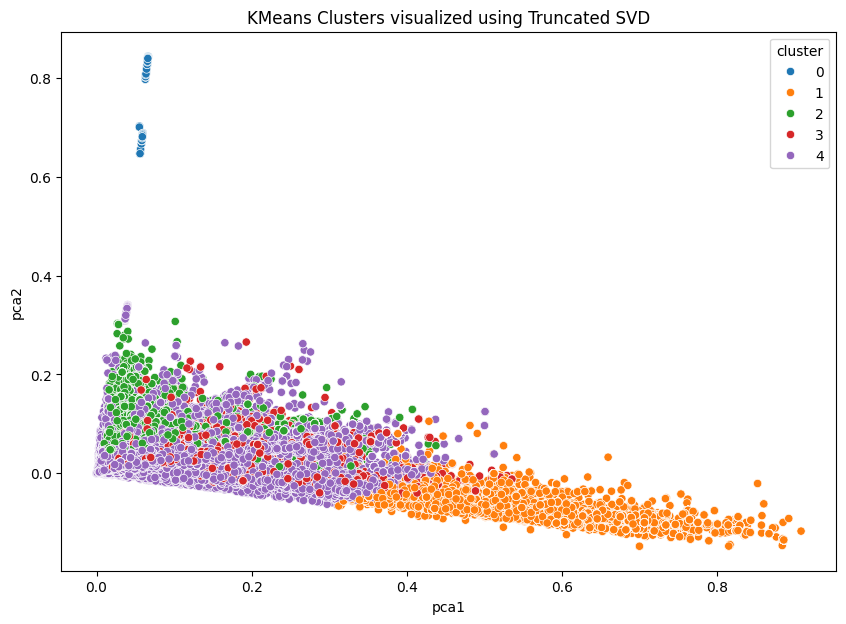

In [15]:
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

# Step 1: Initialize Truncated SVD with n_components=2 for 2D projection
svd = TruncatedSVD(n_components=2)

# Step 2: Apply Truncated SVD on the sparse matrix
svd_result = svd.fit_transform(X)

# Step 3: Store SVD results in your DataFrame
df_tok['pca1'] = svd_result[:, 0]
df_tok['pca2'] = svd_result[:, 1]

# Step 4: Plot the result
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_tok, palette='tab10', legend='full')
plt.title('KMeans Clusters visualized using Truncated SVD')
plt.show()

C:\Users\lespinosa\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


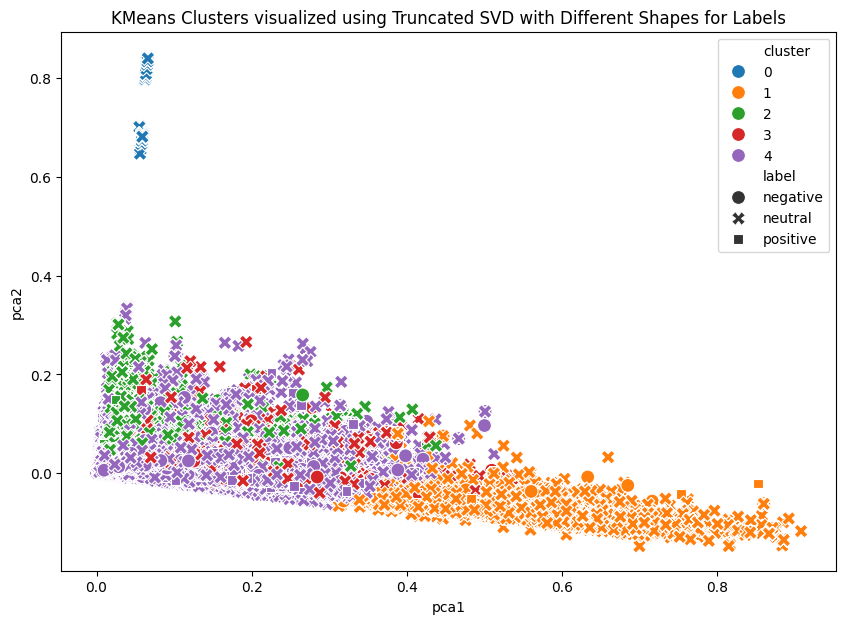

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

# Step 1: Initialize Truncated SVD with n_components=2 for 2D projection
svd = TruncatedSVD(n_components=2)

# Step 2: Apply Truncated SVD on the sparse matrix
svd_result = svd.fit_transform(X)

# Step 3: Store SVD results in your DataFrame
df_tok['pca1'] = svd_result[:, 0]
df_tok['pca2'] = svd_result[:, 1]

# Step 4: Plot the result
plt.figure(figsize=(10, 7))

# Use the 'style' parameter to set different marker shapes based on the 'label' column
sns.scatterplot(
    x='pca1', y='pca2',
    hue='cluster',            # Different colors for clusters
    style='label',            # Different shapes for labels
    data=df_tok,
    palette='tab10',          # Color palette for clusters
    legend='full',            # Display full legend
    s=100                     # Size of the markers
)

plt.title('KMeans Clusters visualized using Truncated SVD with Different Shapes for Labels')
plt.show()